In [1]:
import pandas as pd

customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

print("Customers Dataset:")
print(customers.head())
print("\nProducts Dataset:")
print(products.head())
print("\nTransactions Dataset:")
print(transactions.head())

print("\nMissing Values:")
print("Customers:")
print(customers.isnull().sum())
print("Products:")
print(products.isnull().sum())
print("Transactions:")
print(transactions.isnull().sum())




Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166   

In [2]:
print("\nSummary Statistics for Customers.csv:")
print("\nNumerical Columns:")
print(customers.describe())
print("\nCategorical Columns:")
print(customers.describe(include=['object']))
print("\nSignupDate Range:")
print(customers['SignupDate'].min(), "to", customers['SignupDate'].max())

print("\nSummary Statistics for Products.csv:")
print("\nNumerical Columns:")
print(products.describe())
print("\nCategorical Columns:")
print(products.describe(include=['object']))

print("\nSummary Statistics for Transactions.csv:")
print("\nNumerical Columns:")
print(transactions.describe())
print("\nCategorical Columns:")
print(transactions.describe(include=['object']))
print("\nTransactionDate Range:")
print(transactions['TransactionDate'].min(), "to", transactions['TransactionDate'].max())



Summary Statistics for Customers.csv:

Numerical Columns:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2022-04-16
freq            1                 1             59           3

Categorical Columns:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2022-04-16
freq            1                 1             59           3

SignupDate Range:
2022-01-22 to 2024-12-28

Summary Statistics for Products.csv:

Numerical Columns:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000

Categorical Columns:
   

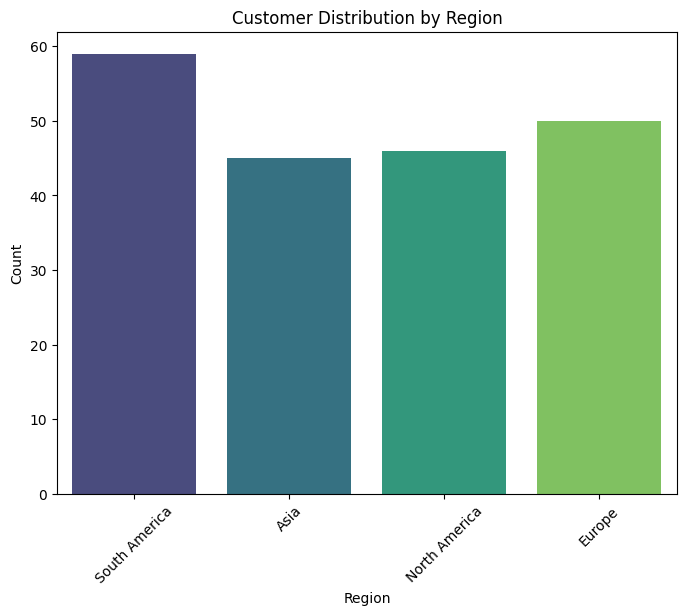

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(data=customers, x='Region', hue='Region', palette='viridis', legend=False)
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


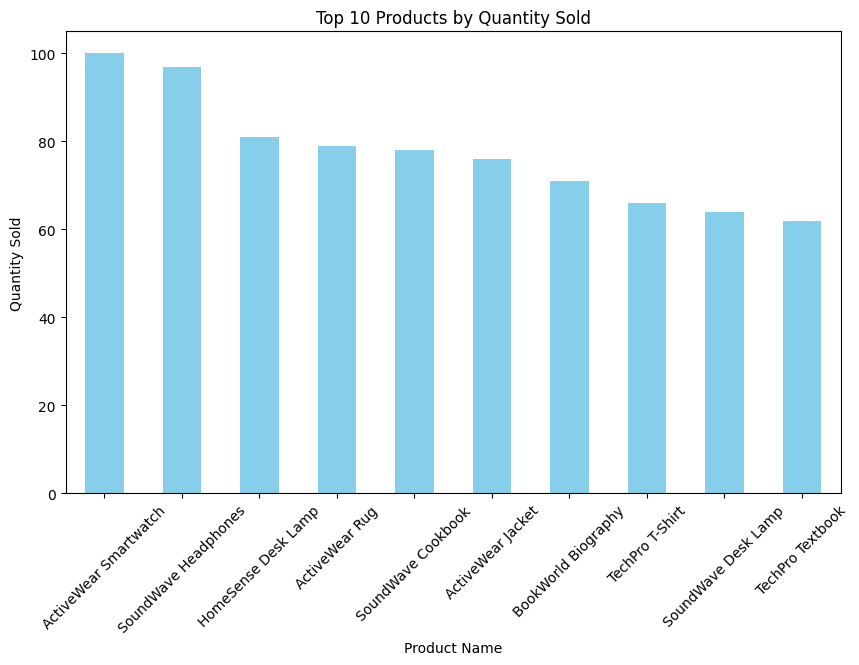

In [13]:
transactions_products = transactions.merge(products, on='ProductID')

top_products = transactions_products.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()


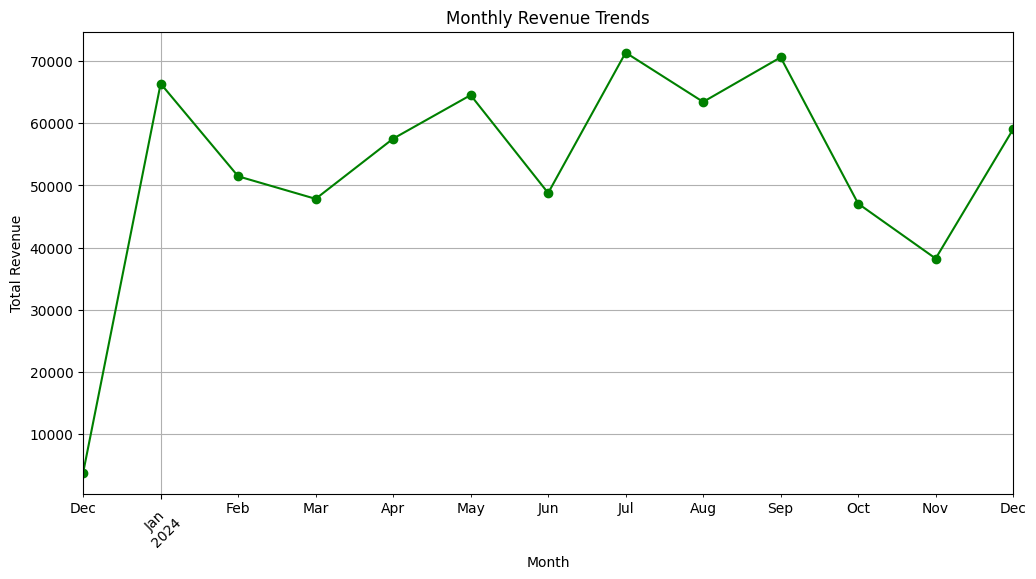

In [14]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_revenue = transactions.groupby('Month')['TotalValue'].sum()

plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', marker='o', color='green')
plt.title('Monthly Revenue Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
